# Stage 4 Consolidation as a function of time

This code is produced on python, by group 14. Hdr=6.33m

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Set variables to their calculated values, all determined in Section 3**

In [10]:
de=1.356
F=2.728
Hdr=6.33
Ch=0.0272 #m^2/week
Cv=0.0108864 #m^2/week
s=0

**Defining a function to calculate Uv (vertical consolidation)**

In [11]:
def U_vertical(Tv, s):
    
    for m in range(0,10**4):
        q=(2/((np.pi/2)*(2*m+1))**2*np.exp(-((np.pi/2)*(2*m+1))**2*Tv))
        s+=q
           
    Uv=1-s
    s=0
    q=0
    return Uv

**Sizing the lists**

In [12]:
t_values=[]
U_values=[]

**Looping through all the time values (in weeks) and determing the consolidation associated**

This code calculates U, from U=1-(1-Uv)(1-Uh). Uh is determined on time, and the design of the pre-fabricated vertical drains. Uv is also a function of time.

In [13]:
for t in range(1,52):
    Tv=Cv*t/Hdr**2
    Uv=U_vertical(Tv, s)
    
    Th=Ch*t/de**2
    Uh=1-np.exp(-8*Th/F)
    
    U=1-(1-Uv)*(1-Uh)
    
    t_values.append(t)
    U_values.append(U)

Results=pd.DataFrame({'t value': t_values, 'U value': U_values})

In [14]:
print(Results)

    t value   U value
0         1  0.060263
1         2  0.107221
2         3  0.150313
3         4  0.190574
4         5  0.228471
5         6  0.264285
6         7  0.298213
7         8  0.330407
8         9  0.360993
9        10  0.390077
10       11  0.417751
11       12  0.444099
12       13  0.469196
13       14  0.493109
14       15  0.515902
15       16  0.537634
16       17  0.558358
17       18  0.578125
18       19  0.596984
19       20  0.614977
20       21  0.632149
21       22  0.648537
22       23  0.664181
23       24  0.679115
24       25  0.693373
25       26  0.706986
26       27  0.719985
27       28  0.732399
28       29  0.744255
29       30  0.755578
30       31  0.766393
31       32  0.776724
32       33  0.786593
33       34  0.796020
34       35  0.805027
35       36  0.813631
36       37  0.821852
37       38  0.829707
38       39  0.837213
39       40  0.844385
40       41  0.851238
41       42  0.857787
42       43  0.864045
43       44  0.870026
44       4

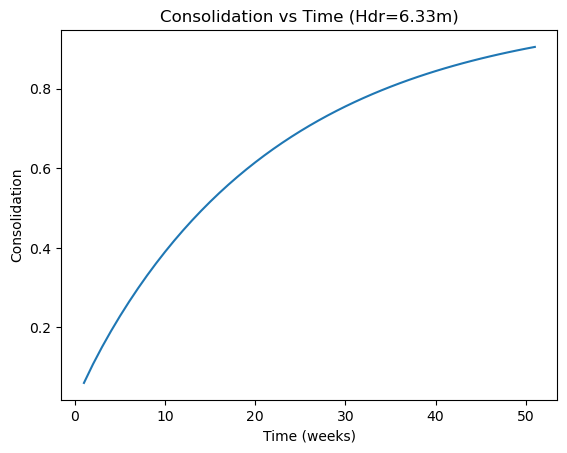

In [15]:
plt.plot(t_values, U_values)

plt.xlabel('Time (weeks)')
plt.ylabel('Consolidation')
plt.title('Consolidation vs Time (Hdr=6.33m)')

plt.show()